In [1]:
#Import the relevant packages
import pygsti
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn
seaborn.set()
#import pygsti.extras

/Users/kmrudin/pyGSTi/packages/pygsti/tools/matrixtools.py:23: UserWarning: Could not import Cython extension - falling back to slower pure-python routines
  _warnings.warn("Could not import Cython extension - falling back to slower pure-python routines")


## Getting the data

In [2]:
#Declare the directed connectivity for ibmqx3.  Qubit pairs are listed in (control, target) error.
directed_edge_list = [(0,1),(3,14),(13,4),(12,5),(6,11),(7,10),(9,8)]

#Declare horizontal distances from spectator qubit to edges driven by CNOTs ("ladder rungs").
#Note that "-1" indicates a distance of 1 to the left.
distances = [-1,1,2,3,4,5,6]

In [3]:
edge_to_distance_dict = {i[0]:i[1] for i in zip(directed_edge_list,distances)}
distance_to_edge_dict = {i[1]:i[0] for i in zip(directed_edge_list,distances)}

In [4]:
data_dict = {}

In [5]:
cases = ['before','during','after']

In [6]:
path = 'IBM_data/'

In [7]:
#a=0 # Spectator qubit is always 15
for distance in distance_to_edge_dict:
    print (distance)
    b = distance_to_edge_dict[distance][0]#Define control qubit.
    c = distance_to_edge_dict[distance][1]#Define target qubit.
    for case in cases:
#        ds a is 15, b is 0, c is 1 after driving a.txt
#        print(path+'ds a is 15, b is '+str(b)+', c is '+str(c)+' '+case+' driving a.txt')
        ds = pygsti.io.load_dataset(path+'ds a is 15, b is '+str(b)+', c is '+str(c)+' '+case+' driving a.txt',cache=True)
        data_dict[distance,case] = ds

-1
Loading from cache file: IBM_data/ds a is 15, b is 0, c is 1 before driving a.txt.cache
Loading from cache file: IBM_data/ds a is 15, b is 0, c is 1 during driving a.txt.cache
Loading from cache file: IBM_data/ds a is 15, b is 0, c is 1 after driving a.txt.cache
1
Loading from cache file: IBM_data/ds a is 15, b is 3, c is 14 before driving a.txt.cache
Loading from cache file: IBM_data/ds a is 15, b is 3, c is 14 during driving a.txt.cache
Loading from cache file: IBM_data/ds a is 15, b is 3, c is 14 after driving a.txt.cache
2
Loading from cache file: IBM_data/ds a is 15, b is 13, c is 4 before driving a.txt.cache
Loading from cache file: IBM_data/ds a is 15, b is 13, c is 4 during driving a.txt.cache
Loading from cache file: IBM_data/ds a is 15, b is 13, c is 4 after driving a.txt.cache
3
Loading from cache file: IBM_data/ds a is 15, b is 12, c is 5 before driving a.txt.cache
Loading from cache file: IBM_data/ds a is 15, b is 12, c is 5 during driving a.txt.cache
Loading from cache

In [8]:
case_pairs = [('before','after'),('before','during')]

In [9]:
preps = pygsti.io.load_gatestring_list(path+'/4HS_prepFiducials.txt')
effects = pygsti.io.load_gatestring_list(path+'/4HS_measFiducials.txt')

In [10]:
#The circuits in an LGST experiment are identical to the circuits in an LSGST experiment
#if the germs are just the bare gates, and only L=1 is used.
germs=[pygsti.objects.GateString(('Gi',)),pygsti.objects.GateString(('Gh',)),pygsti.objects.GateString(('Gs',))]

In [11]:
lengths = [1]

In [12]:
gatestrings = pygsti.construction.make_lsgst_experiment_list(['Gi','Gh','Gs'],preps,effects,germs,lengths)

In [13]:
num_strs = len(gatestrings)

## Analyzing the data

In [14]:
comparators = {}

In [15]:
corrected_significance_level = 1 - pygsti.tools.bonferroni_correction(0.95,14)
print(corrected_significance_level)

0.0035714285714285587


In [16]:
for distance in distances:
    for case0,case1 in case_pairs:
        print('\n')
        if (case0, case1) == ('before','after'):
            print('Distance to CNOT =',str(distance)+".",'('+str(case0)+',',str(case1)+'):',"checking for drift.")
        else:
            print('Distance to CNOT =',str(distance)+".",'('+str(case0)+',',str(case1)+'):',"checking for crosstalk.")
        comparators[distance,case0,case1] = pygsti.objects.DataComparator([data_dict[distance,case0],data_dict[distance,case1]],gatestrings=gatestrings)
        comparators[distance,case0,case1].implement(significance=corrected_significance_level)
#        comparators[distance,case0,case1].compute_stat_sig_TVDs(verbosity=1)



Distance to CNOT = -1. (before, after): checking for drift.
Statistical hypothesis tests did NOT find inconsistency between the datasets at 0.3571428571428559% significance.



Distance to CNOT = -1. (before, during): checking for crosstalk.
The datasets are INCONSISTENT at 0.3571428571428559% significance.

  Details:
  - Using the composite log-likelihood ratio test, the significance of the inconsistency between datasets is 20.861210808109302 standard deviations.
  - The number of sequences with data that is inconsistent is 5
  - The maximum SSTVD over all sequences is 0.08203125
  - The maximum SSTVD was observed for GhGsGs(Gs)GhGsGh


Distance to CNOT = 1. (before, after): checking for drift.
Statistical hypothesis tests did NOT find inconsistency between the datasets at 0.3571428571428559% significance.



Distance to CNOT = 1. (before, during): checking for crosstalk.
The datasets are INCONSISTENT at 0.3571428571428559% significance.

  Details:
  - Using the composite log-like

In [17]:
#Data for Fig. 3
case0 = 'before'
case1 = 'during'
print('Distance\t SSTVD\t\t Gatestring\t\tGatestring length')
for distance in distances:
#    maxidx = np.argmax(np.array(list(comparators[distance,case0,case1].sstvds.values()))[::,1])
    sequence, max_sstvd = comparators[distance,case0,case1].get_maximum_SSTVD()
    print(distance, '\t\t', max_sstvd, '\t',sequence, '\t\t',len(sequence))
#    print(distance, '\t\t', comparators[distance,case0,case1].sstvds[sequence][1], '\t',sequence, '\t\t',comparators[distance,case0,case1].sstvds[sequence][0])
#    np.max(np.array(list(comparators[distance,case0,case1].sstvds.values()))[::,1])

Distance	 SSTVD		 Gatestring		Gatestring length
-1 		 0.08203125 	 GhGsGs(Gs)GhGsGh 		 7
1 		 0.27734375 	 GhGsGs(Gs)GsGh 		 6
2 		 0.1298828125 	 GhGsGs(Gi)GhGsGh 		 7
3 		 0.056640625 	 GhGs(Gi)GsGh 		 5
4 		 0.029296875 	 GhGsGs(Gs)GsGh 		 6
5 		 0.029296875 	 GhGs(Gi)GhGsGh 		 6
6 		 0.0234375 	 GhGs(Gi)GhGsGh 		 6


In [18]:
[comparators[distance,case0,case1].get_maximum_SSTVD()[1] for distance in distances]

[0.08203125,
 0.27734375,
 0.1298828125,
 0.056640625,
 0.029296875,
 0.029296875,
 0.0234375]

## Plotting the results

Text(0,0.5,'SSTVD')

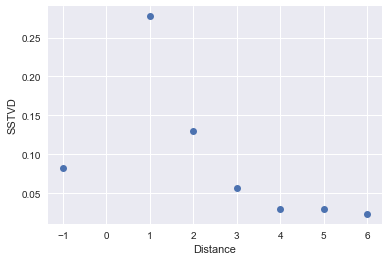

In [19]:
plt.plot(distances,[comparators[distance,case0,case1].get_maximum_SSTVD()[1] for distance in distances],'o')
plt.xlabel('Distance')
plt.ylabel('SSTVD')

In [20]:
#Additional data analysis visualization may be performed.
#Here is a small sampling.

In [21]:
w = pygsti.report.Workspace()
w.init_notebook_mode(connected=False, autodisplay=True) 

In [22]:
#Plot p-value histograms for each of the (driving-no-)
for distance in distances:
    print('distance='+str(distance))
    w.DatasetComparisonHistogramPlot(comparators[distance,'before','during'], log=True, display='pvalue')

distance=-1


distance=1


distance=2


distance=3


distance=4


distance=5


distance=6


In [23]:
gssList = pygsti.construction.make_lsgst_structs(['Gi','Gh','Gs'], preps, effects, germs, lengths)

In [24]:
#See which specific circuits detect the crosstalk.
#Note that some circuits show up as multiple pixels in a plot.  Mouse over pixel for more information;
#"value" refers to log-likelihood ratio.
for distance in distances:
    print('distance='+str(distance))
    w.ColorBoxPlot('dscmp', gssList[-1], None, None, dscomparator=comparators[distance,'before','during'])

distance=-1


distance=1


distance=2


distance=3


distance=4


distance=5


distance=6
